In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기



In [ ]:
df=pd.read_csv("/content/diabetes.csv", index_col=0)
#데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [ ]:
#컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'label')

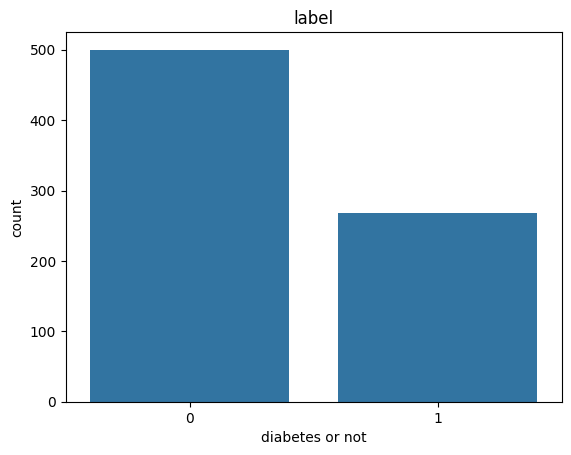

In [ ]:
#레이블 갯수 확인
sns.countplot(data=df, x="Outcome")
plt.xlabel("diabetes or not")
plt.ylabel("count")
plt.title("label")

In [ ]:
#레이블 갯수 확인 (숫자)
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
#결측치 확인
df.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#결측치 제거
df=df.dropna()
df.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
X=df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [ ]:
y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


#1.당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.

(SVM, LR, RF, DT, KNN)

머신러닝 SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_svm=SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm=clf_svm.predict(X_test)
print("\n--------- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--------- SVM Classifier ---
0.7922077922077922
[[98  9]
 [23 24]]


머신러닝LR

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr=LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr=clf_lr.predict(X_test)
print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8051948051948052
[[96 11]
 [19 28]]


머신러닝RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

print("\n---Random Forest---")
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


---Random Forest---
0.7987012987012987
[[92 15]
 [16 31]]


머신러닝DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt=clf_dt.predict(X_test)
print("\n--- Decision Tree Classifier---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier---
0.7012987012987013
[[80 27]
 [19 28]]


머신러닝KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

pred_knn=clf_knn.predict(X_test)
print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.7402597402597403
[[88 19]
 [21 26]]
